## Parameters of a Worm-Like Chain Molecule from Force-Extension Measurements

Francisco J. Palmero Moya @ Nynke Dekker Lab\
28/11/2023

In [1]:
# Import libraries
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Import wlc modules
import sys
sys.path.append('../')
import wlc.models as models
import wlc.fitting as fitting

### Generate synthetic dataset

Text(0, 0.5, 'force [pN]')

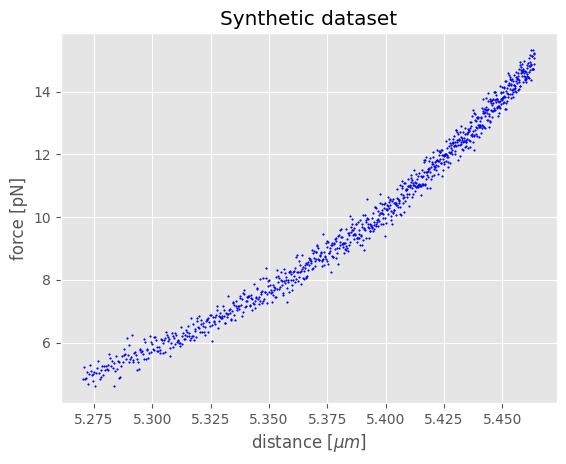

In [2]:
# Synthetic dataset parameters
KB = 0.013806 # Boltzmann constant in pN*nm*K-1
T = 30  # in degrees Celsius
Lc = 5600  # contour length in nm
Lp = 53  # persistence length in nm
S = 1255  # stretch modulus in pN

# Generate data with noise
F = np.linspace(5, 15, 1000)
d = models.odijk(F, KB*(273.15 + T), Lc, Lp, S)
data = d, F + np.random.normal(scale = 0.25, size=len(F))

# Plot the data
fig, ax = plt.subplots()
ax.set_title("Synthetic dataset")
ax.scatter(data[0], data[1], s = 1, c = "blue")
ax.set_xlabel(r"distance [$\mu m$]")
ax.set_ylabel(r"force [pN]")

### Fitting to obtain optimal parameters

In [3]:
# Load the YAML file
with open("../ymls/params.yml", 'r') as file:
    params = yaml.safe_load(file)

In [4]:
# Odijk
model = fitting.WormLikeChain(model="ebouchiat")
print(model)

Modified Bouchiat et al. worm-like chain model with seventh order correction.

    .. math::
        F = \frac{k_BT}{L_p} \left[\frac{1}{4\left(1-\frac{d}{L_c}\right)^2}-\frac{1}{4}+\frac{d}{L_c} +\sum_{n=1}^7 \alpha_n \left(\frac{d}{L_c}\right)^n\right]

    Parameters
    ----------
    d : array-like
        Distance between end-points. Units: [um]
    kBT : float
        Boltzman contant times Temperature. Units: [pN*nm]
    Lc : float 
        Contour length. Units: [nm]
    Lp : float
        Persistance length. Units: [nm]
    S : float
        Stretch modulus. Units: [pN]

    Outputs
    -------
    F : array-like
        Required force to extend a worm-like chain. Units: [pN]

    C. Bouchiat, M.D. Wang, J.-F. Allemand, T. Strick, S.M. Block, V. Croquette
    Estimating the Persistence Length of a Worm-Like Chain Molecule from Force-Extension Measurements
    Biophysical Journal
    


In [5]:
# Compile model
model.compile(params)

# Fitting to the data
df = model.fit(data, min_delta=params["min_delta"], max_iters=params["max_iters"], verbose=True)

100%|██████████| 20/20 [00:00<00:00, 952.56it/s]


In [6]:
# Results are stored in a dataframe
df.head()

,opt_Lc[nm],opt_Lp[nm],opt_S[pN],nFittings,filename
0,5721.15506,31.673247,9999.999562,2,None


In [7]:
# The progress along iterations
model.df_full

,Lc[nm],Lp[nm],S[pN],Chisqr,filename,iter,dLp[nm]
0,5721.155071,31.673244,9999.999984,84.644934,None,1,inf
1,5721.155060,31.673247,9999.999562,84.644934,None,2,0.000003


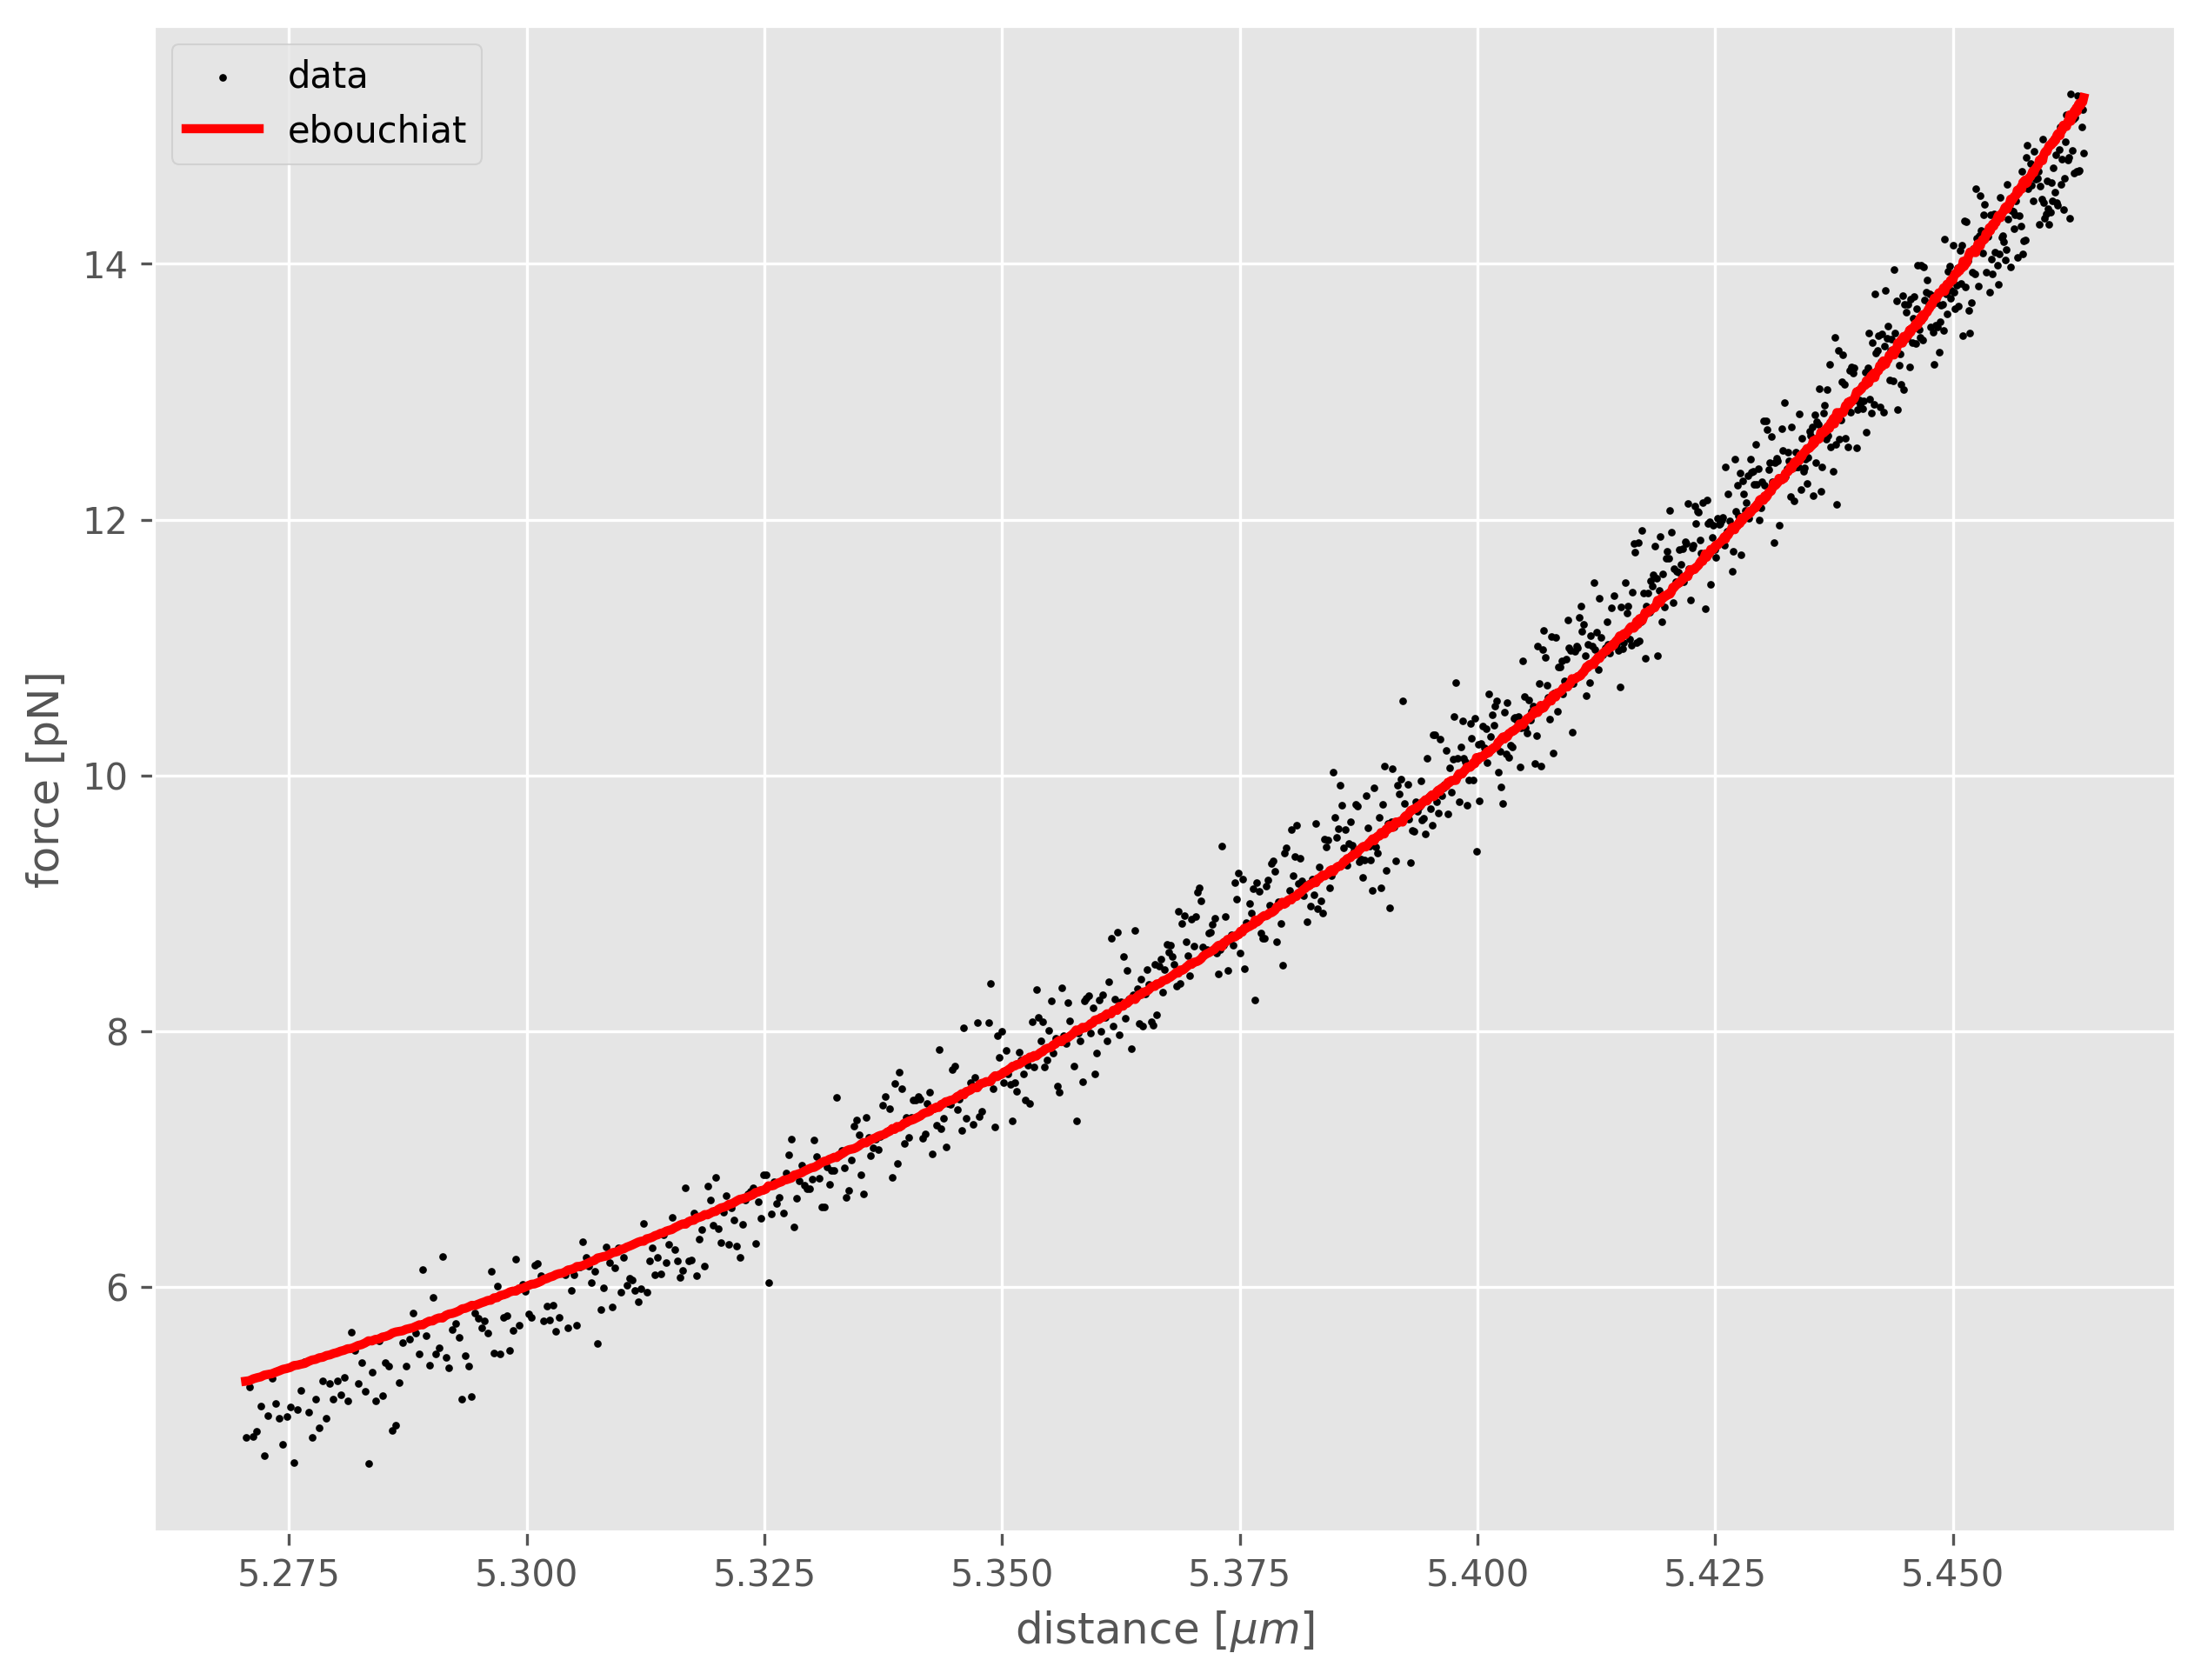

In [8]:
# Plot results
model.plot(data)

In [9]:
# Summary of fitting statistics
model.stats()

[[Model]]
    Model(ebouchiat)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 70
    # data points      = 1000
    # variables        = 3
    chi-square         = 84.6449336
    reduced chi-square = 0.08489963
    Akaike info crit   = -2463.29002
    Bayesian info crit = -2448.56676
    R-squared          = 0.98998428
[[Variables]]
    kBT:  4.185289 (fixed)
    Lc:   5721.15506 +/- 9.55200895 (0.17%) (init = 5600)
    Lp:   31.6732466 +/- 1.12672473 (3.56%) (init = 31.67324)
    S:    9999.99956 +/- 5218.15648 (52.18%) (init = 1255)
[[Correlations]] (unreported correlations are < 0.100)
    C(Lc, Lp) = -0.9966
    C(Lc, S)  = +0.9929
    C(Lp, S)  = -0.9803


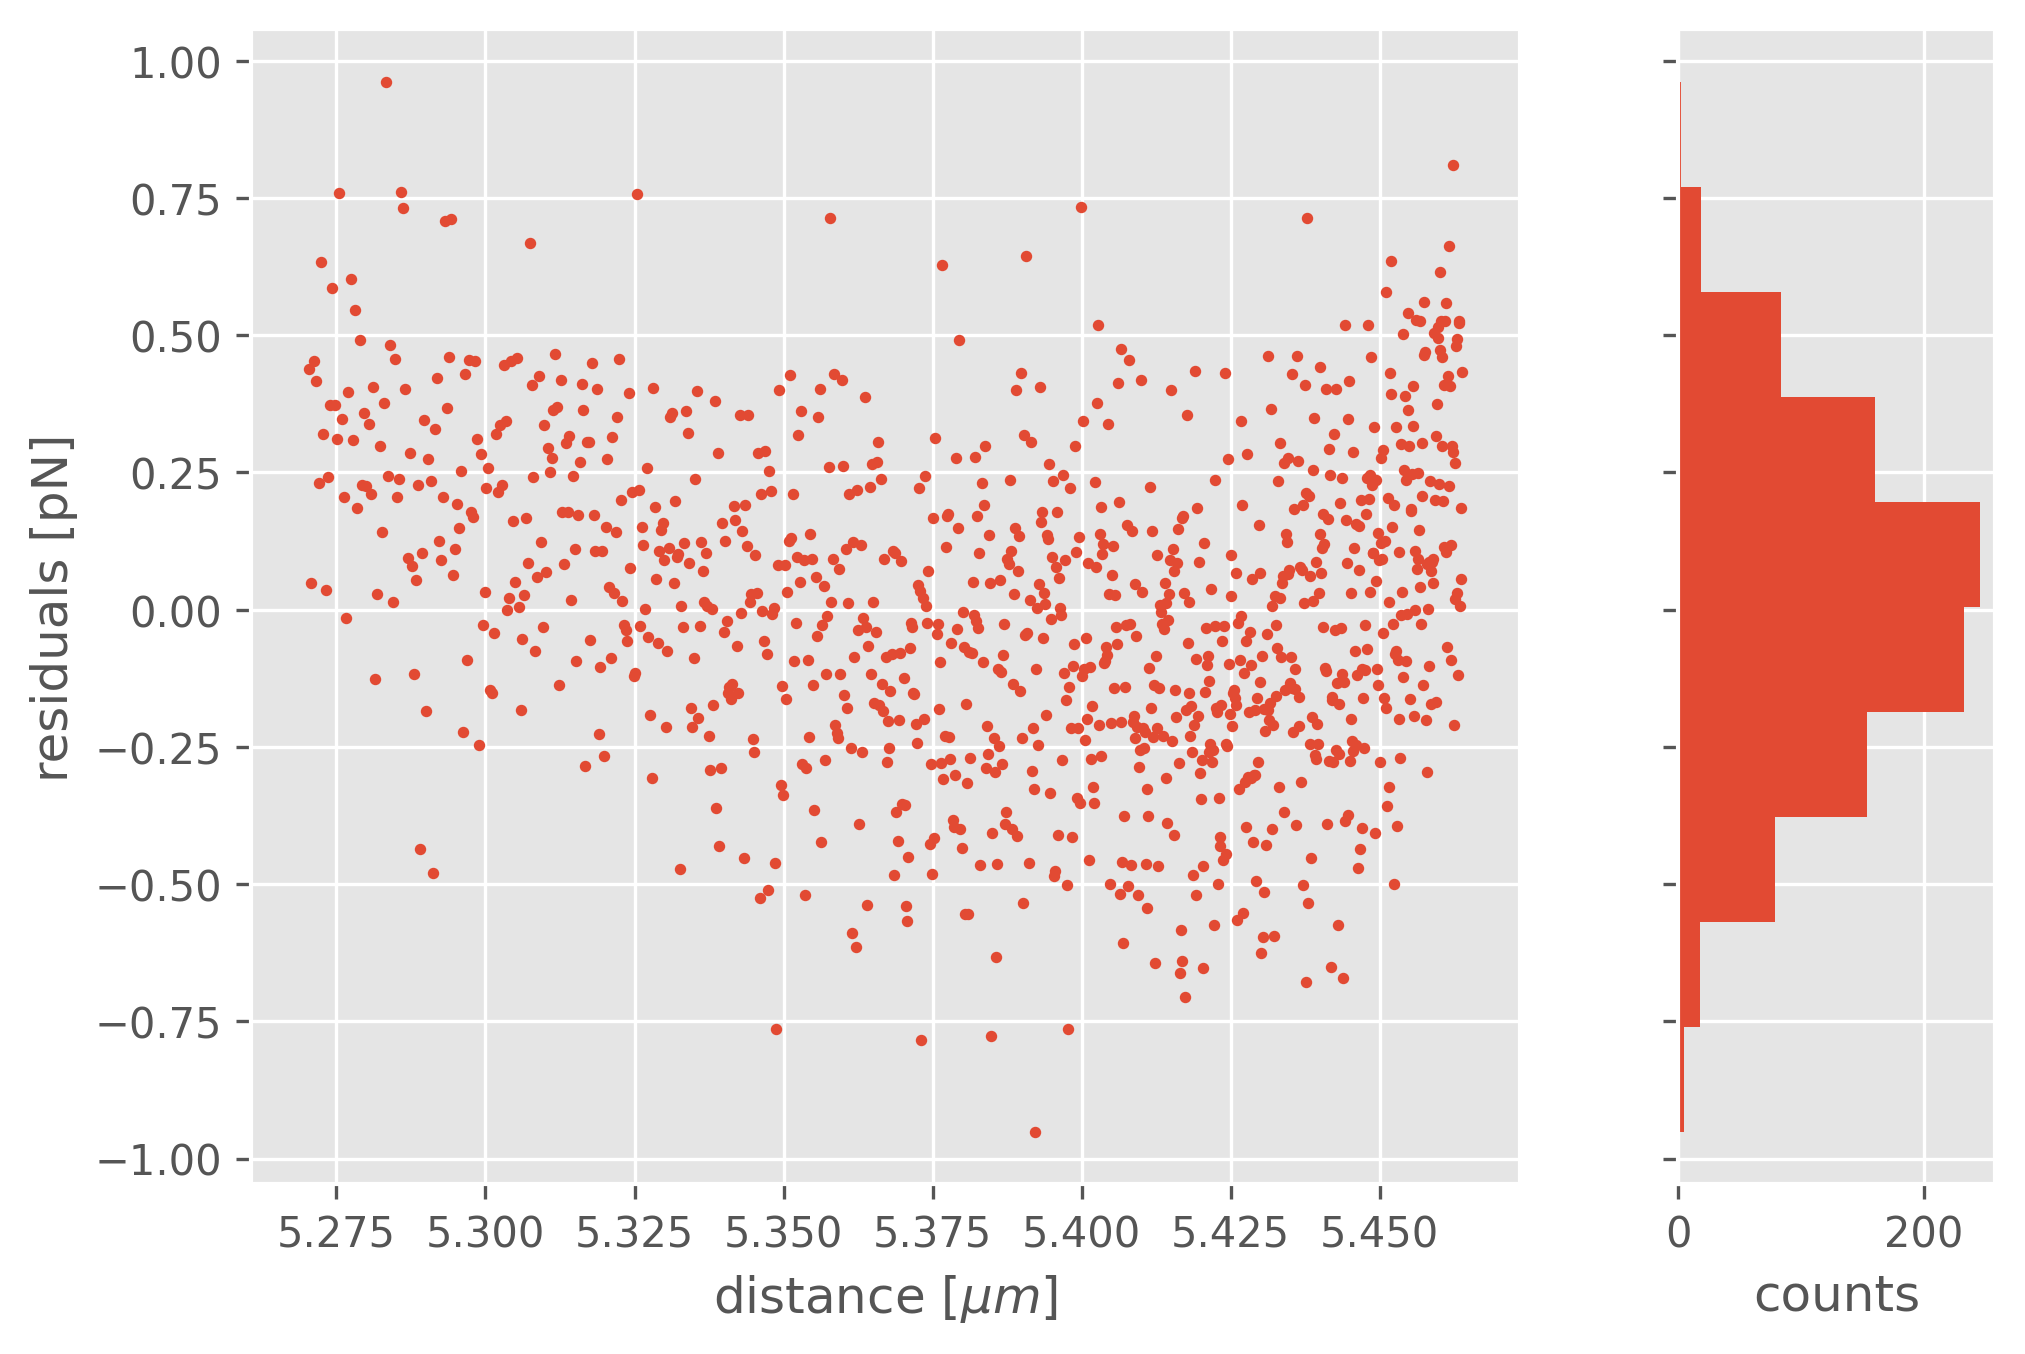

In [10]:
model.plot_residuals(data)